## The use of additonal data
This example demonstrates the uses of the 'produce..._plus' methods of model classes, which produce additional
data (exceeding the data used to evaluate the tests). This data can be used to investigate the model behaviour in more detail.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import sciunit
import numpy as np

from capabilities2 import ProduceXY

from models2 import VierlingSimpleModelRobust

from scipy.stats import ttest_ind

#from tests import Test4040,Test3030,Test2020,Test2040,Test4020

from visualizations import plot_statistics

/usr/local/lib/python2.7/dist-packages/pandas-0.19.2-py2.7-linux-x86_64.egg/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


### Model parameters

In [3]:
controlparams = {'n_ex': 20,'n_inh': 10,'eta': 5.0,'tau_R': 0.1,'tau_ex': 2.0,'tau_inh': 8.0,'g_ee': 0.015,'g_ei': 0.025,'g_ie': 0.015,'g_ii': 0.02,'g_de': 0.3,'g_di': 0.08,'dt': 0.05,'b_ex': -0.01,'b_inh': -0.01,'background_rate': 33.3,'A': 0.5,'filename': 'default','directory': '/'}

schizparams = {'n_ex': 20,'n_inh': 10,'eta': 5.0,'tau_R': 0.1,'tau_ex': 2.0,'tau_inh': 28.0,'g_ee': 0.015,'g_ei': 0.025,'g_ie': 0.015,'g_ii': 0.02,'g_de': 0.3,'g_di': 0.08,'dt': 0.05,'b_ex': -0.01,'b_inh': -0.01,'background_rate': 33.3,'A': 0.5,'filename': 'default','directory': '/'}

seeds = np.load('Seeds.npy')

### Instantiating the model

In [4]:
test_model = VierlingSimpleModelRobust(controlparams,schizparams,seeds)

### Run simulations 

In [5]:
print 'Run simulations (this might take 15-20 minutes)'
print '\n 4040'
mcontrol4040,mschiz4040,control4040,schiz4040 = test_model.produce_XY_plus(stimfrequency=40.0,powerfrequency=40.0)
print '\n 3030'
mcontrol3030,mschiz3030,control3030,schiz3030 = test_model.produce_XY_plus(stimfrequency=30.0,powerfrequency=30.0)
print '\n 2020'
mcontrol2020,mschiz2020,control2020,schiz2020 = test_model.produce_XY_plus(stimfrequency=20.0,powerfrequency=20.0)
print '\n 2040'
mcontrol2040,mschiz2040,control2040,schiz2040 = test_model.produce_XY_plus(stimfrequency=40.0,powerfrequency=20.0)
print '\n 4020'
mcontrol4020,mschiz4020,control4020,schiz4020 = test_model.produce_XY_plus(stimfrequency=20.0,powerfrequency=40.0)

Run simulations (this might take 15-20 minutes)

 4040
Seed number: 0
Control model created
Control model simulated
Control PSD calculated
Schiz model created
Schiz model simulated
Schiz PSD calculated
Seed number: 1
Control model created
Control model simulated
Control PSD calculated
Schiz model created
Schiz model simulated
Schiz PSD calculated
Seed number: 2
Control model created
Control model simulated
Control PSD calculated
Schiz model created
Schiz model simulated
Schiz PSD calculated
Seed number: 3
Control model created
Control model simulated
Control PSD calculated
Schiz model created
Schiz model simulated
Schiz PSD calculated
Seed number: 4
Control model created
Control model simulated
Control PSD calculated
Schiz model created
Schiz model simulated
Schiz PSD calculated
Seed number: 5
Control model created
Control model simulated
Control PSD calculated
Schiz model created
Schiz model simulated
Schiz PSD calculated
Seed number: 6
Control model created
Control model simulated
Co

### Visualize the data

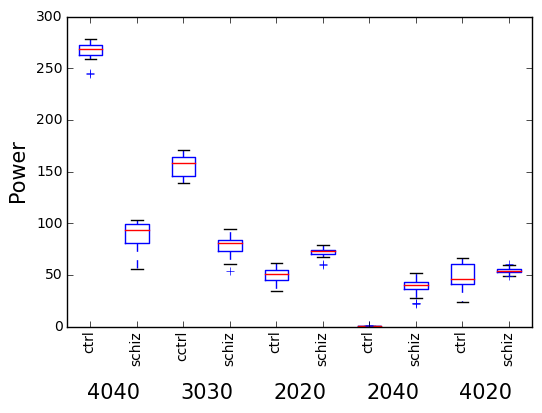

In [6]:

# Plot data as a boxplot
labels = list(['ctrl','schiz','cctrl','schiz','ctrl','schiz',\
          'ctrl','schiz','ctrl','schiz'])
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.boxplot([control4040,schiz4040,control3030,schiz3030,control2020,schiz2020,control2040,schiz2040,control4020,\
                  schiz4020])
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel('Power',fontsize=15)
a=ax.annotate('4040',xy=(0.1,0),xytext=(0,-55),xycoords='axes fraction',
    textcoords='offset points',size=15,ha='center',va='bottom')
a=ax.annotate('3030',xy=(0.3,0),xytext=(0,-55),xycoords='axes fraction',
    textcoords='offset points',size=15,ha='center',va='bottom')
a=ax.annotate('2020',xy=(0.5,0),xytext=(0,-55),xycoords='axes fraction',
    textcoords='offset points',size=15,ha='center',va='bottom')
a=ax.annotate('2040',xy=(0.7,0),xytext=(0,-55),xycoords='axes fraction',
    textcoords='offset points',size=15,ha='center',va='bottom')
a=ax.annotate('4020',xy=(0.9,0),xytext=(0,-55),xycoords='axes fraction',
    textcoords='offset points',size=15,ha='center',va='bottom')

In [7]:
t4040,p4040 = ttest_ind(control4040,schiz4040)
t3030,p3030 = ttest_ind(control3030,schiz3030)
t2020,p2020 = ttest_ind(control2020,schiz2020)
t2040,p2040 = ttest_ind(control2040,schiz2040)
t4020,p4020 = ttest_ind(control4020,schiz4020)
print '40Hz power at 40Hz drive: F=',t4040,'p=',p4040
print '30Hz power at 30Hz drive: F=',t3030,'p=',p3030
print '20Hz power at 20Hz drive: F=',t2020,'p=',p2020
print '20Hz power at 40Hz drive: F=',t2040,'p=',p2040
print '40Hz power at 20Hz drive: F=',t4020,'p=',p4020

40Hz power at 40Hz drive: F= 51.8698283512 p= 7.00615973185e-37
30Hz power at 30Hz drive: F= 23.4080401139 p= 3.545942616e-24
20Hz power at 20Hz drive: F= -11.3292852332 p= 9.5206066581e-14
20Hz power at 40Hz drive: F= -19.198563914 p= 3.72735850992e-21
40Hz power at 20Hz drive: F= -2.08532975168 p= 0.0438080382856
